# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/ASUS/Desktop/PROJECT/csv files/DSData-master_2/DSData-master/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [3]:
df.shape

(1599, 12)

# Data infromation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Descriptive Statistics

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].count()

1599

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

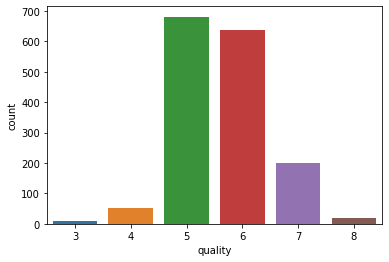

In [11]:
sns.countplot(x='quality',data=df)

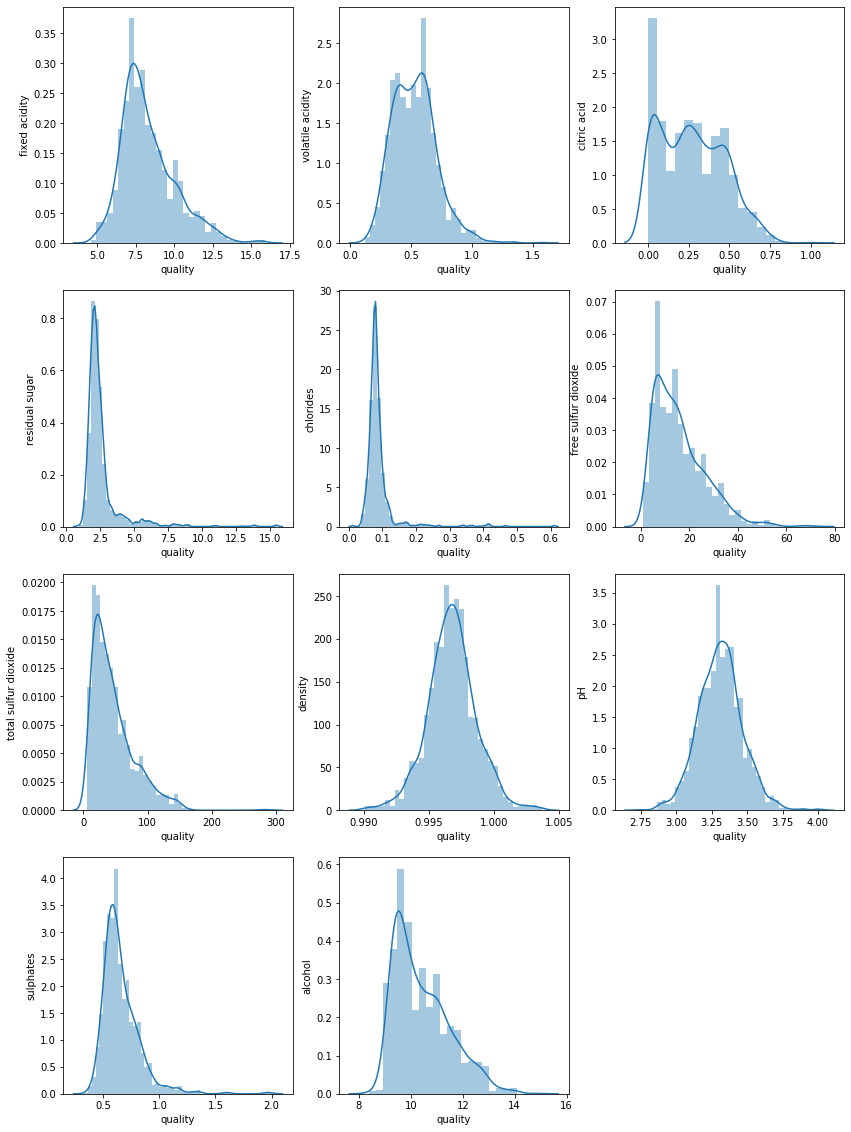

In [12]:
plt.figure(figsize=(14,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.ylabel(column,fontsize=10)
        plt.xlabel('quality',fontsize=10)
    plotnumber+=1
plt.show()

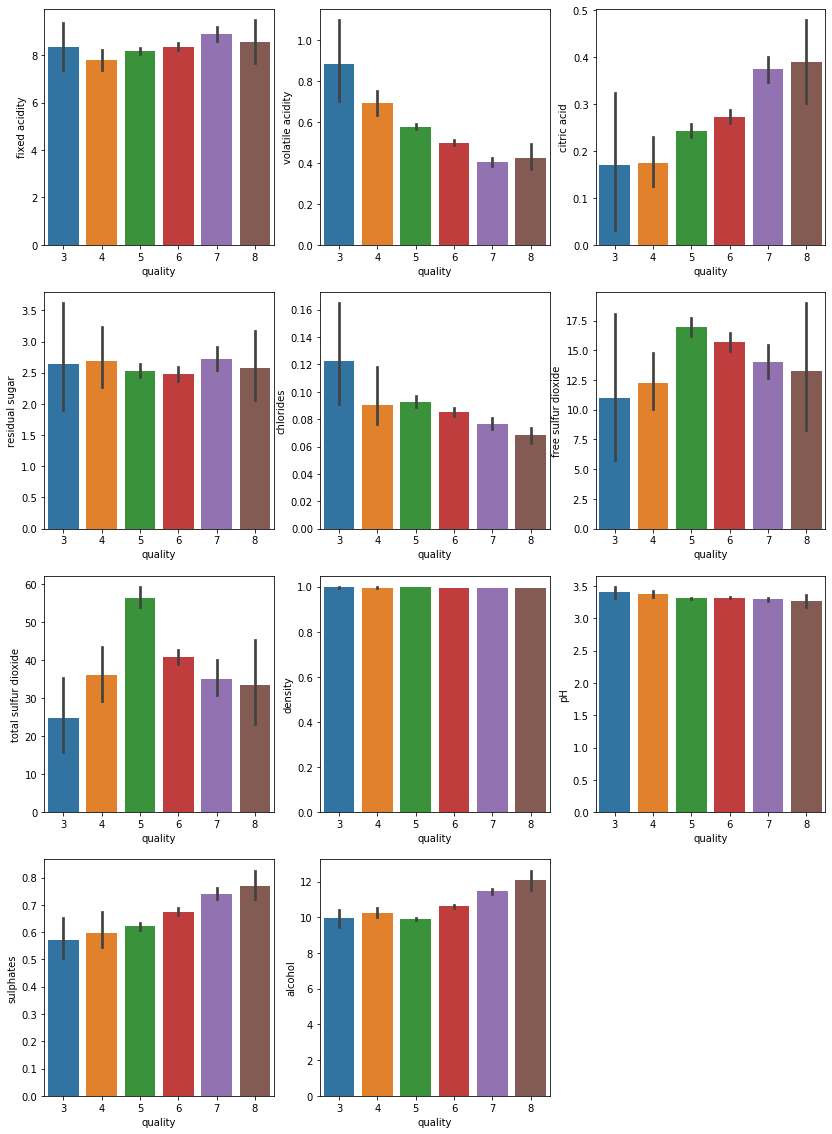

In [13]:
plt.figure(figsize=(14,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.barplot(x='quality', y=column, data=df)
        plt.ylabel(column,fontsize=10)
        plt.xlabel('quality',fontsize=10)
    plotnumber+=1
plt.show()

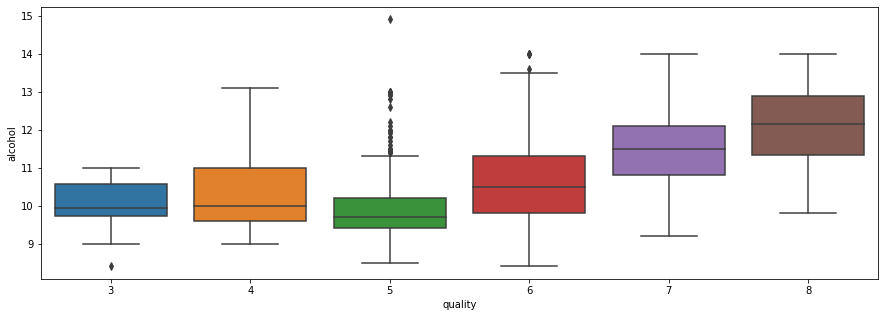

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x='quality',y='alcohol',data=df)

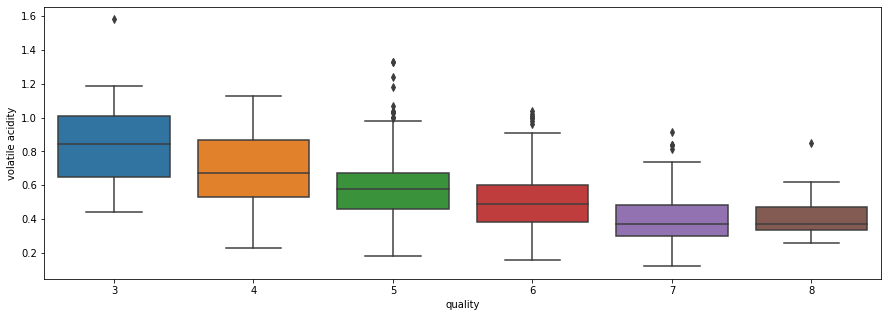

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(x='quality',y='volatile acidity',data=df)

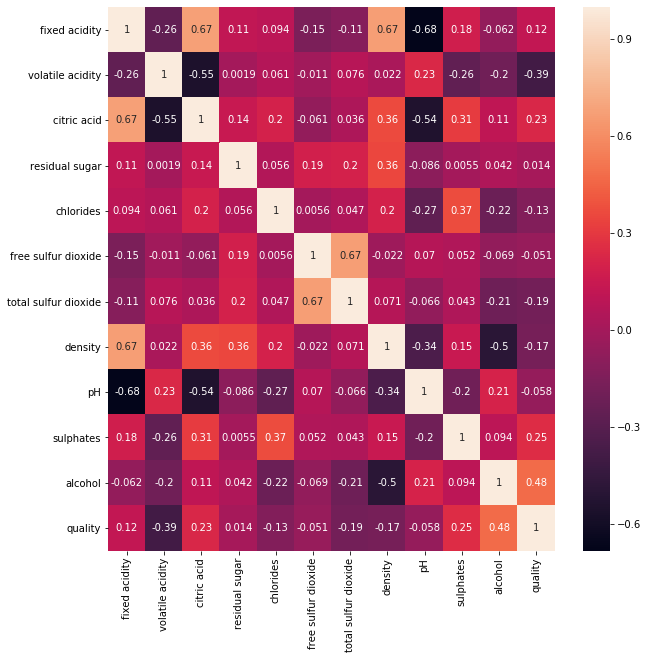

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Classification Bins

In [17]:
group = ['good','bad']
bins = (2,6.5,8)
df['quality'] = pd.cut(df['quality'],bins=bins,labels=group)

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [19]:
label = LabelEncoder()
df['quality'] = label.fit_transform(df['quality'])

In [20]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [21]:
X = df.drop('quality',axis=1)
y = df.quality

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling the Data

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [25]:
y_train

642     1
679     1
473     1
390     0
1096    1
861     1
898     0
231     1
744     1
215     1
953     0
55      1
785     1
1522    1
602     1
527     1
279     0
1442    1
224     1
302     1
864     1
218     1
1564    1
828     0
1115    1
295     1
546     1
692     1
808     1
506     0
       ..
850     1
448     1
1455    1
755     1
976     1
115     1
777     1
72      1
845     1
537     1
849     1
174     1
87      1
551     1
1510    1
705     1
314     1
1420    1
600     1
1496    1
1094    1
599     1
277     1
1033    1
1383    1
763     1
835     1
1216    1
559     1
684     1
Name: quality, Length: 1279, dtype: int32

In [26]:
#Using Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
#Using Support Vector Machine(SVM)
svc1 = SVC(kernel='linear') 
svc1.fit(X_train,y_train)

svc2 = SVC(kernel='rbf') #kernel SVM Algorithm
svc2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
#Using Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
#Printing Each model Accuracy of Traing Data
print('1. Logistic Regression Traing Accuracy : ',lr.score(X_train,y_train))

print('2. K Nearest neighbors(KNN) Traing Accuracy : ',knn.score(X_train,y_train))

print('3. Support Vector machine(Linear) Traing Accuracy : ',svc1.score(X_train,y_train))

print('4. Support Vector machine(RBF)  Traing Accuracy : ',svc2.score(X_train,y_train))

print('5. GaussianNB Traing Accuracy : ',gauss.score(X_train,y_train))

print('6. Decision Tree Classifier Traing Accuracy : ',tree.score(X_train,y_train))

print('7. Random Forest Classifie Traing Accuracy : ',forest.score(X_train,y_train))

1. Logistic Regression Traing Accuracy :  0.8733385457388585
2. K Nearest neighbors(KNN) Traing Accuracy :  0.8983580922595777
3. Support Vector machine(Linear) Traing Accuracy :  0.8537920250195465
4. Support Vector machine(RBF)  Traing Accuracy :  0.893666927286943
5. GaussianNB Traing Accuracy :  0.8358092259577795
6. Decision Tree Classifier Traing Accuracy :  1.0
7. Random Forest Classifie Traing Accuracy :  0.99687255668491


In [33]:
#Printing Each model Accuracy of Test Data
print('1. Logistic Regression Traing Accuracy : ',lr.score(X_test,y_test))

print('2. K Nearest neighbors(KNN) Traing Accuracy : ',knn.score(X_test,y_test))

print('3. Support Vector machine(Linear) Traing Accuracy : ',svc1.score(X_test,y_test))

print('4. Support Vector machine(RBF)  Traing Accuracy : ',svc2.score(X_test,y_test))

print('5. GaussianNB Traing Accuracy : ',gauss.score(X_test,y_test))

print('6. Decision Tree Classifier Traing Accuracy : ',tree.score(X_test,y_test))

print('7. Random Forest Classifie Traing Accuracy : ',forest.score(X_test,y_test))

1. Logistic Regression Traing Accuracy :  0.884375
2. K Nearest neighbors(KNN) Traing Accuracy :  0.9
3. Support Vector machine(Linear) Traing Accuracy :  0.90625
4. Support Vector machine(RBF)  Traing Accuracy :  0.921875
5. GaussianNB Traing Accuracy :  0.828125
6. Decision Tree Classifier Traing Accuracy :  0.90625
7. Random Forest Classifie Traing Accuracy :  0.890625


In [34]:
tree2 = DecisionTreeClassifier(criterion='entropy',max_depth=24,min_samples_leaf=1)

In [35]:
tree2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features' : ['auto','log2']
}

In [37]:
grid_search = GridSearchCV(estimator=forest,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [38]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                    

In [39]:
#Lets see the best parameter as per theour grid search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [40]:
forest = RandomForestClassifier(criterion = 'entropy',
 max_depth= 15,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

In [41]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

grid_param = {
    "n_estimators" : [90,100,115],
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split' : [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [43]:
grid_search = GridSearchCV(estimator=forest,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [44]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9168 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 12496 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 14352 tasks     

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=15,
                                              max_features='log2',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [46]:
forest = RandomForestClassifier(criterion = 'entropy',
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 115)

In [47]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=115,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
forest.score(X_test,y_test)

0.93125